## S16 T01: Classifica els diferents vols - Eduardo Baffi
#### Descripció
Comencem a familiaritzar-nos amb Pipelines, grid search i text mining !!! Comencem amb uns quants exercicis bàsics.

Recursos:
Recursos de l'aula i https://www.nltk.org

### Nivell 1
#### - Exercici 1
Agafa el conjunt de dades que vulguis i realitza un pipeline i un gridsearch aplicant l'algorisme de Random Forest.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('housing.csv')
pd.set_option('display.max_columns', None)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


California Housing Prices
Median house prices for California districts derived from the 1990 census.

Content
"The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. The columns are as follows, their names are pretty self explanitory:"

* longitude
* latitude
* housingmedianage
* total_rooms
* total_bedrooms
* population
* households
* median_income
* medianhousevalue
* ocean_proximity

Source: https://www.kaggle.com/camnugent/california-housing-prices?select=housing.csv

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


##### Prepocessing data

In [4]:
df.duplicated().sum()

0

In [5]:
# Check null values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
# Delete row with a low % of null values:'total_bedrooms'
housing_df = df.copy()
housing_df = housing_df.dropna(axis=0, subset=['total_bedrooms'])

In [7]:
housing_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [8]:
housing_df.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


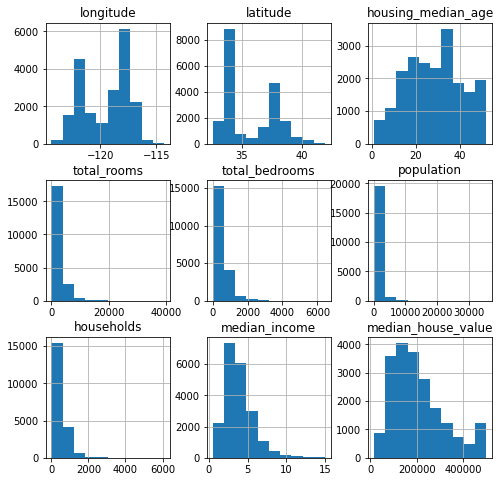

In [11]:
# Visualization of distribution of the the features to chake outliers
import matplotlib.pyplot as plt

housing_df.hist(figsize=(8,8))
plt.show()

In [12]:
print(housing_df.skew())

longitude            -0.296141
latitude              0.464934
housing_median_age    0.061605
total_rooms           4.158816
total_bedrooms        3.459546
population            4.960017
households            3.413850
median_income         1.644557
median_house_value    0.978290
dtype: float64


The ideal skewness value should be between -1 and +1 and a major deviation from this range indicates the presence of extreme values. 

In our case, the results of "total_rooms", "total_bedrooms", "population", "households" and "median_income" may indicate the presence of outliers, but maybe there is a valid reason for these observations.

In [14]:
# Quantile-based Flooring and Capping

print(housing_df['total_rooms'].quantile(0.10))
print(housing_df['total_rooms'].quantile(0.90))
print("")
print(housing_df['total_bedrooms'].quantile(0.10))
print(housing_df['total_bedrooms'].quantile(0.90))
print("")
print(housing_df['population'].quantile(0.10))
print(housing_df['population'].quantile(0.90))
print("")
print(housing_df['households'].quantile(0.10))
print(housing_df['households'].quantile(0.90))
print("")
print(housing_df['median_income'].quantile(0.10))
print(housing_df['median_income'].quantile(0.90))

943.0
4654.999999999996

198.0
965.0

511.0
2563.7999999999993

184.20000000000005
890.0

1.9044
6.1575


In [21]:
#Removing outliers

housing_df['total_rooms'] = np.where(housing_df['total_rooms'] <943.0, 943.0,housing_df['total_rooms'])
housing_df['total_rooms'] = np.where(housing_df['total_rooms'] >4654.99, 4654.99,housing_df['total_rooms'])
print(f"total_rooms: {housing_df['total_rooms'].skew()}")
print("")
housing_df['total_bedrooms'] = np.where(housing_df['total_bedrooms'] <198.0, 198.0,housing_df['total_bedrooms'])
housing_df['total_bedrooms'] = np.where(housing_df['total_bedrooms'] >965.0, 965.0,housing_df['total_bedrooms'])
print(f"total_bedrooms: {housing_df['total_bedrooms'].skew()}")
print("")
housing_df['population'] = np.where(housing_df['population'] <511.0, 511.0,housing_df['population'])
housing_df['population'] = np.where(housing_df['population'] >2563.79, 2563.79,housing_df['population'])
print(f"population: {housing_df['population'].skew()}")
print("")
housing_df['households'] = np.where(housing_df['households'] <184.2, 184.2,housing_df['households'])
housing_df['households'] = np.where(housing_df['households'] >890.0, 890.0,housing_df['households'])
print(f"households: {housing_df['households'].skew()}")
print("")
housing_df['median_income'] = np.where(housing_df['median_income'] <1.9044, 1.9044,housing_df['median_income'])
housing_df['median_income'] = np.where(housing_df['median_income'] >6.1575, 6.1575,housing_df['median_income'])
print(f"median_income: {housing_df['median_income'].skew()}")
      

total_rooms: 0.6356719663405328

total_bedrooms: 0.6676211127863431

population: 0.6390672524684904

households: 0.6378629445869649

median_income: 0.3905572656544576


In [22]:
# Results after removing outliers
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2395.090176,493.447316,1312.160660,460.277678,3.729988,206864.413155
std,2.003578,2.136348,12.591805,1170.265924,242.142429,645.869592,222.189834,1.371261,115435.667099
min,-124.350000,32.540000,1.000000,943.000000,198.000000,511.000000,184.200000,1.904400,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,4654.990000,965.000000,2563.790000,890.000000,6.157500,500001.000000


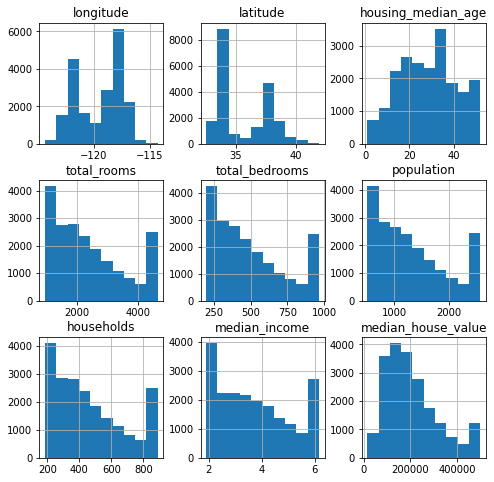

In [23]:
housing_df.hist(figsize=(8,8))
plt.show()

In [27]:
# Just the numerical features were evaluated until now
# Now the categorical features will que transformed with OneHotEncoder and included in the analysis

from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(housing_df)

data_categorical = housing_df[categorical_columns]
data_categorical.head()

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY


In [28]:
# OneHotEoncoder

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

data_encoded = encoder.fit_transform(data_categorical)

columns_encoded = encoder.get_feature_names(data_categorical.columns)
result = pd.DataFrame(data_encoded, columns=columns_encoded, index= housing_df.index)
result.head()

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [30]:
housing_df = housing_df.join(result) # Join the columns genetared after OneHotEncoder
housing_df = housing_df.drop(['ocean_proximity'], 1)
housing_df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,943.00,198.0,511.0,184.2,6.1575,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,4654.99,965.0,2401.0,890.0,6.1575,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.00,198.0,511.0,184.2,6.1575,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.00,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.00,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0


##### Pipeline

In [31]:
# After prepocessing data, we will build pipeline
# Separating features and labels:

X=housing_df.drop(['median_house_value'],axis=1)
Y=housing_df['median_house_value']

In [58]:
from sklearn.preprocessing import StandardScaler

steps = [('scaler', StandardScaler()), ('rforest', RandomForestRegressor(n_estimators = 1000, max_depth=10, random_state=42))]#n_estimators = 1000, max_depth=10, random_state=42))]

pipeline = Pipeline(steps) # define the pipeline object.

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=42)

In [76]:
from sklearn.model_selection import GridSearchCV

#prepare a range of alpha values to test
parameters =  { 'rforest__n_estimators': [200, 500],
    'rforest__max_features': ['auto', 'sqrt'],
    'rforest__max_depth' : [8, 10]}
    
# create and fit a Random Forrest, testing each alpha
grid = GridSearchCV(pipeline, param_grid=parameters,cv=5)
grid.fit(X_train, y_train)

#print ("score = %3.2f" %(grid.score(X_test,y_test)))
#print (grid.best_params_)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rforest',
                                        RandomForestRegressor(max_depth=10,
                                                              n_estimators=1000,
                                                              random_state=42))]),
             param_grid={'rforest__max_depth': [8, 10],
                         'rforest__max_features': ['auto', 'sqrt'],
                         'rforest__n_estimators': [200, 500]})

In [78]:
print ("score = %3.2f" %(grid.score(X_test,y_test)))
print (f"Best fit parameters: {grid.best_params_}")

score = 0.78
Best fit parameters: {'rforest__max_depth': 10, 'rforest__max_features': 'auto', 'rforest__n_estimators': 500}


In [84]:
grid.predict(X_test)

array([215758.67097016, 151446.77463427, 195798.01417353, ...,
       130774.64397356,  74794.7395192 , 101345.36890737])

#### - Exercici 2
Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules

In [109]:
# Word Tokenization

import nltk
from nltk.tokenize import word_tokenize

text ="""About the book SAPIENS: Seventy thousand years ago, there were at least six different human species on earth. They were insignificant animals,
whose ecological impact was less than that of fireflies or jellyfish. Today, there is only one human species left: Us. 
Homo sapiens. But we rule this planet. Sapiens, the book, takes us on a breath-taking ride through our entire human history, 
from its evolutionary roots to the age of capitalism and genetic engineering, to uncover why we are the way we are.
Sapiens focuses on key processes that shaped humankind and the world around it, such as the advent of agriculture, 
the creation of money, the spread of religion and the rise of the nation state. Unlike other books of its kind, 
Sapiens takes a multi-disciplinary approach that bridges the gaps between history, biology, philosophy and economics 
in a way never done before. Furthermore, taking both the macro and the micro view, Sapiens conveys not only what happened and 
why, but also how it felt for individuals."""

tokenized_word=word_tokenize(text)
print(tokenized_word)

['About', 'the', 'book', 'SAPIENS', ':', 'Seventy', 'thousand', 'years', 'ago', ',', 'there', 'were', 'at', 'least', 'six', 'different', 'human', 'species', 'on', 'earth', '.', 'They', 'were', 'insignificant', 'animals', ',', 'whose', 'ecological', 'impact', 'was', 'less', 'than', 'that', 'of', 'fireflies', 'or', 'jellyfish', '.', 'Today', ',', 'there', 'is', 'only', 'one', 'human', 'species', 'left', ':', 'Us', '.', 'Homo', 'sapiens', '.', 'But', 'we', 'rule', 'this', 'planet', '.', 'Sapiens', ',', 'the', 'book', ',', 'takes', 'us', 'on', 'a', 'breath-taking', 'ride', 'through', 'our', 'entire', 'human', 'history', ',', 'from', 'its', 'evolutionary', 'roots', 'to', 'the', 'age', 'of', 'capitalism', 'and', 'genetic', 'engineering', ',', 'to', 'uncover', 'why', 'we', 'are', 'the', 'way', 'we', 'are', '.', 'Sapiens', 'focuses', 'on', 'key', 'processes', 'that', 'shaped', 'humankind', 'and', 'the', 'world', 'around', 'it', ',', 'such', 'as', 'the', 'advent', 'of', 'agriculture', ',', 'the

In [110]:
# Frequency Distribution
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 123 samples and 196 outcomes>


In [111]:
fdist.most_common(5)

[(',', 16), ('the', 13), ('.', 9), ('of', 7), ('and', 6)]

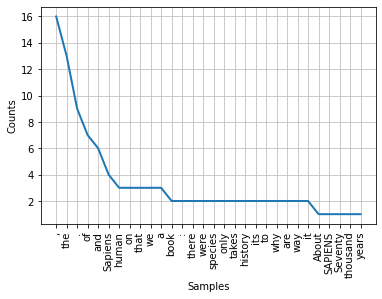

In [112]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

### Nivell 2
#### - Exercici 1
Treu les stopwords i realitza stemming al teu conjunt de dades.

##### Removing Stopwords

In [116]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{"that'll", 'up', 'doesn', 'is', 'those', 'below', 'over', "needn't", "mustn't", 'ourselves', 'while', "hasn't", 'shan', 'aren', 'does', 'which', 'are', 'if', 'won', 'through', "mightn't", "wouldn't", 'more', 'out', 'other', 'has', 'y', 're', 'because', 'then', 'by', 'doing', 'were', 'not', 'a', 'him', 'themselves', 'been', 'that', 'where', 's', 'above', 'haven', 'its', 'once', 'his', 'what', 'be', 'as', 'both', 'of', "you've", 'whom', 'who', "shan't", 'such', 'yours', 'needn', 'will', "hadn't", "shouldn't", 'in', 'mustn', 've', 'at', "you're", 'only', 'now', 'do', 'how', "wasn't", "you'll", "don't", 'and', "haven't", 'them', "it's", 'did', 'own', "couldn't", 'nor', "won't", 'when', 'yourselves', 'the', 'or', 'should', 'she', 'ma', 'you', 'so', 'can', 'between', 'o', 'hers', "doesn't", 'this', 'about', "should've", 'down', 'their', 'my', "isn't", "you'd", 'had', 'why', 'being', 'ours', 't', 'here', 'than', 'shouldn', 'any', 'your', 'on', 'most', 'before', 'during', 'theirs', 'was', 'mi

In [118]:
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("TOKENIZED SENTENCE:",tokenized_word)
print("FILTERED SENTENCE:",filtered_sent)

TOKENIZED SENTENCE: ['About', 'the', 'book', 'SAPIENS', ':', 'Seventy', 'thousand', 'years', 'ago', ',', 'there', 'were', 'at', 'least', 'six', 'different', 'human', 'species', 'on', 'earth', '.', 'They', 'were', 'insignificant', 'animals', ',', 'whose', 'ecological', 'impact', 'was', 'less', 'than', 'that', 'of', 'fireflies', 'or', 'jellyfish', '.', 'Today', ',', 'there', 'is', 'only', 'one', 'human', 'species', 'left', ':', 'Us', '.', 'Homo', 'sapiens', '.', 'But', 'we', 'rule', 'this', 'planet', '.', 'Sapiens', ',', 'the', 'book', ',', 'takes', 'us', 'on', 'a', 'breath-taking', 'ride', 'through', 'our', 'entire', 'human', 'history', ',', 'from', 'its', 'evolutionary', 'roots', 'to', 'the', 'age', 'of', 'capitalism', 'and', 'genetic', 'engineering', ',', 'to', 'uncover', 'why', 'we', 'are', 'the', 'way', 'we', 'are', '.', 'Sapiens', 'focuses', 'on', 'key', 'processes', 'that', 'shaped', 'humankind', 'and', 'the', 'world', 'around', 'it', ',', 'such', 'as', 'the', 'advent', 'of', 'agr

##### Stemming

In [120]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("FILTERED SENTENCE:",filtered_sent)
print("STEMMED SENTENCE:",stemmed_words)

FILTERED SENTENCE: ['About', 'book', 'SAPIENS', ':', 'Seventy', 'thousand', 'years', 'ago', ',', 'least', 'six', 'different', 'human', 'species', 'earth', '.', 'They', 'insignificant', 'animals', ',', 'whose', 'ecological', 'impact', 'less', 'fireflies', 'jellyfish', '.', 'Today', ',', 'one', 'human', 'species', 'left', ':', 'Us', '.', 'Homo', 'sapiens', '.', 'But', 'rule', 'planet', '.', 'Sapiens', ',', 'book', ',', 'takes', 'us', 'breath-taking', 'ride', 'entire', 'human', 'history', ',', 'evolutionary', 'roots', 'age', 'capitalism', 'genetic', 'engineering', ',', 'uncover', 'way', '.', 'Sapiens', 'focuses', 'key', 'processes', 'shaped', 'humankind', 'world', 'around', ',', 'advent', 'agriculture', ',', 'creation', 'money', ',', 'spread', 'religion', 'rise', 'nation', 'state', '.', 'Unlike', 'books', 'kind', ',', 'Sapiens', 'takes', 'multi-disciplinary', 'approach', 'bridges', 'gaps', 'history', ',', 'biology', ',', 'philosophy', 'economics', 'way', 'never', 'done', '.', 'Furthermore

### Nivell 3
#### - Exercici 1
Realitza sentiment analysis al teu conjunt de dades.

In [225]:
# Creating a pandas dataframe from reviews.txt file
data = pd.read_csv('vaccineHesitancy.txt', delimiter="\t", header = None)
data

,0
0,The right and wrong ways to reduce vaccine hes...
1,"For countries with lots of covid-19 vaccines, ..."
2,In America most adults who want the shots alre...
3,"France, where skepticism about vaccines has lo..."
4,"Fortunately, hesitancy has been falling steadi..."
5,"YouGov, a pollster, has run surveys about vacc..."
6,By late June just 20 did.
7,Identifying the cause of this dip is hard beca...
8,"However, the drop has been unusually steep in ..."
9,Among the many factors that could change scept...


In [212]:
mydata = data.rename(columns={ 0 :'Phrases'})
mydata.head(5)

,Phrases
0,The right and wrong ways to reduce vaccine hes...
1,"For countries with lots of covid-19 vaccines, ..."
2,In America most adults who want the shots alre...
3,"France, where skepticism about vaccines has lo..."
4,"Fortunately, hesitancy has been falling steadi..."


In [213]:
# Cleaning the text: to remove the special characters, numbers from the text. 
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

# Cleaning the text in the review column
mydata['Cleaned Reviews'] = mydata['Phrases'].apply(clean)
mydata.head()

,Phrases,Cleaned Reviews
0,The right and wrong ways to reduce vaccine hes...,The right and wrong ways to reduce vaccine hes...
1,"For countries with lots of covid-19 vaccines, ...",For countries with lots of covid vaccines the ...
2,In America most adults who want the shots alre...,In America most adults who want the shots alre...
3,"France, where skepticism about vaccines has lo...",France where skepticism about vaccines has lon...
4,"Fortunately, hesitancy has been falling steadi...",Fortunately hesitancy has been falling steadily


In [229]:
# Tokenization, POS tagging, Stopwords removal

# Tokenization: process of breaking the text into smaller pieces called Tokens. 
# Parts of Speech (POS) tagging: process of converting each token into a tuple having the form (word, tag).
# Stopwords removal: remove words that carry very little useful information. 

import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:      
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

mydata['POS tagged'] = mydata['Cleaned Reviews'].apply(token_stop_pos)
mydata.head()

,Phrases,Cleaned Reviews,POS tagged
0,The right and wrong ways to reduce vaccine hes...,The right and wrong ways to reduce vaccine hes...,"[(right, n), (wrong, a), (ways, n), (reduce, v..."
1,"For countries with lots of covid-19 vaccines, ...",For countries with lots of covid vaccines the ...,"[(countries, n), (lots, n), (covid, n), (vacci..."
2,In America most adults who want the shots alre...,In America most adults who want the shots alre...,"[(America, n), (adults, n), (want, v), (shots,..."
3,"France, where skepticism about vaccines has lo...",France where skepticism about vaccines has lon...,"[(France, n), (skepticism, n), (vaccines, n), ..."
4,"Fortunately, hesitancy has been falling steadi...",Fortunately hesitancy has been falling steadily,"[(Fortunately, r), (hesitancy, n), (falling, v..."


In [231]:
# Obtaining the stem words – Lemmatization
# lemmatize is a function that takes pos_tag tuples, and gives the Lemma for each word in pos_tag based on the pos of that word.

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

mydata['Lemma'] = mydata['POS tagged'].apply(lemmatize)
mydata.head()

,Phrases,Cleaned Reviews,POS tagged,Lemma
0,The right and wrong ways to reduce vaccine hes...,The right and wrong ways to reduce vaccine hes...,"[(right, n), (wrong, a), (ways, n), (reduce, v...",right wrong way reduce vaccine hesitancy peo...
1,"For countries with lots of covid-19 vaccines, ...",For countries with lots of covid vaccines the ...,"[(countries, n), (lots, n), (covid, n), (vacci...",country lot covid vaccine important task con...
2,In America most adults who want the shots alre...,In America most adults who want the shots alre...,"[(America, n), (adults, n), (want, v), (shots,...",America adult want shot already leave unvacc...
3,"France, where skepticism about vaccines has lo...",France where skepticism about vaccines has lon...,"[(France, n), (skepticism, n), (vaccines, n), ...",France skepticism vaccine long high soon req...
4,"Fortunately, hesitancy has been falling steadi...",Fortunately hesitancy has been falling steadily,"[(Fortunately, r), (hesitancy, n), (falling, v...",Fortunately hesitancy fall steadily


In [234]:
mydata[['Phrases', 'Lemma']]

,Phrases,Lemma
0,The right and wrong ways to reduce vaccine hes...,right wrong way reduce vaccine hesitancy peo...
1,"For countries with lots of covid-19 vaccines, ...",country lot covid vaccine important task con...
2,In America most adults who want the shots alre...,America adult want shot already leave unvacc...
3,"France, where skepticism about vaccines has lo...",France skepticism vaccine long high soon req...
4,"Fortunately, hesitancy has been falling steadi...",Fortunately hesitancy fall steadily
5,"YouGov, a pollster, has run surveys about vacc...",YouGov pollster run survey vaccination count...
6,By late June just 20% did.,late June
7,Identifying the cause of this dip is hard beca...,Identifying cause dip hard hesitancy decline...
8,"However, the drop has been unusually steep in ...",However drop unusually steep place Moreover ...
9,Among the many factors that could change scept...,Among many factor could change sceptic mind ...


In [256]:
# Sentiment Analysis using TextBlob

from textblob import TextBlob

# function to calculate subjectivity
def getSubjectivity(Phrases):
    return TextBlob(Phrases).sentiment.subjectivity

# function to calculate polarity
def getPolarity(Phrases):
    return TextBlob(Phrases).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [257]:
fin_data = pd.DataFrame(mydata[['Phrases', 'Lemma']])

In [258]:
fin_data.head(2)

,Phrases,Lemma
0,The right and wrong ways to reduce vaccine hes...,right wrong way reduce vaccine hesitancy peo...
1,"For countries with lots of covid-19 vaccines, ...",country lot covid vaccine important task con...


In [259]:
# Creating a new data frame with the Phrases, Lemma columns and apply the above functions

fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity) 
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity) 
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data

,Phrases,Lemma,Subjectivity,Polarity,Analysis
0,The right and wrong ways to reduce vaccine hes...,right wrong way reduce vaccine hesitancy peo...,0.728571,0.011905,Positive
1,"For countries with lots of covid-19 vaccines, ...",country lot covid vaccine important task con...,1.000000,0.400000,Positive
2,In America most adults who want the shots alre...,America adult want shot already leave unvacc...,0.425000,0.225000,Positive
3,"France, where skepticism about vaccines has lo...",France skepticism vaccine long high soon req...,0.470000,0.055000,Positive
4,"Fortunately, hesitancy has been falling steadi...",Fortunately hesitancy fall steadily,0.600000,0.283333,Positive
5,"YouGov, a pollster, has run surveys about vacc...",YouGov pollster run survey vaccination count...,0.250000,0.000000,Neutral
6,By late June just 20% did.,late June,0.600000,-0.300000,Negative
7,Identifying the cause of this dip is hard beca...,Identifying cause dip hard hesitancy decline...,0.541667,-0.291667,Negative
8,"However, the drop has been unusually steep in ...",However drop unusually steep place Moreover ...,1.000000,0.200000,Positive
9,Among the many factors that could change scept...,Among many factor could change sceptic mind ...,0.500000,0.350000,Positive


In [260]:
# Count the number of positive, negative, neutral reviews.

tb_counts = fin_data.Analysis.value_counts()
tb_counts

Positive    15
Negative     6
Neutral      5
Name: Analysis, dtype: int64